## Import Packages and Load Dataset

In [ ]:
# For data manipulation
import pandas as pd 
import numpy as np

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Relevant models and tools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error # Calculate MSE (cost function)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
%matplotlib inline

# Load data
df = pd.read_csv('winequality-red.csv')

# Show shape of data
print(f'Shape of dataset (rows, columns): {df.shape}')

df.head()

Shape of dataset (rows, columns): (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Visualization and Preprocessing


Number of null values in each column: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



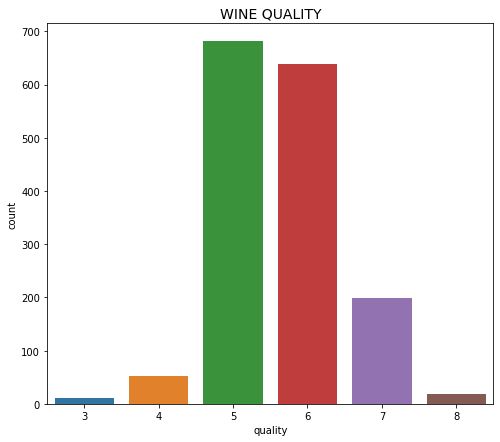

In [ ]:
# Check for missing values
print(f'\nNumber of null values in each column: \n{df.isnull().sum()}\n') # apparently, there are no null values in the dataset.

plt.figure(figsize=(8,7))
sns.countplot(x="quality", data=df)  
plt.title("WINE QUALITY",fontsize=14)
plt.show()

# Split data into features and output variable
data_X = df.drop(['quality'], axis=1).values
data_y = df['quality'].values 

## Split Dataset and Feature Scaling

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=.20, random_state=42)

# Perform feature scaling using standardization
scaler = StandardScaler().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Plot coefficients
def plot_errors(lambdas, train_errors, test_errors, title):
  plt.figure(figsize=(14, 8))
  plt.plot(lambdas, train_errors, label="train")
  plt.plot(lambdas, test_errors, label="test")
  plt.xlabel("$\\lambda$", fontsize=14)
  plt.ylabel("MSE", fontsize=14)
  plt.title(title, fontsize=20)
  plt.legend(fontsize=14)
  plt.show()

## Linear Regression with Lasso (L1) Regularization

Coefficient when alpha is 0.01: [ 0.00989776 -0.17148147 -0.          0.         -0.07748588  0.03095668
 -0.09541456 -0.         -0.04895099  0.13129167  0.29799921]

Coefficient when alpha is 0.11: [ 0.         -0.13799039  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.02553106  0.23974954]

Coefficient when alpha is 0.21000000000000002: [ 0.         -0.06192225  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.15823808]

Coefficient when alpha is 0.31000000000000005: [ 0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.07125747]

Coefficient when alpha is 0.41000000000000003: [ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]

Coefficient when alpha is 0.51: [ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]

Coefficient when alpha is 0.6100000000000001: [ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]

Coefficient when alpha is 0.7100000000000001: [ 0. -0.  

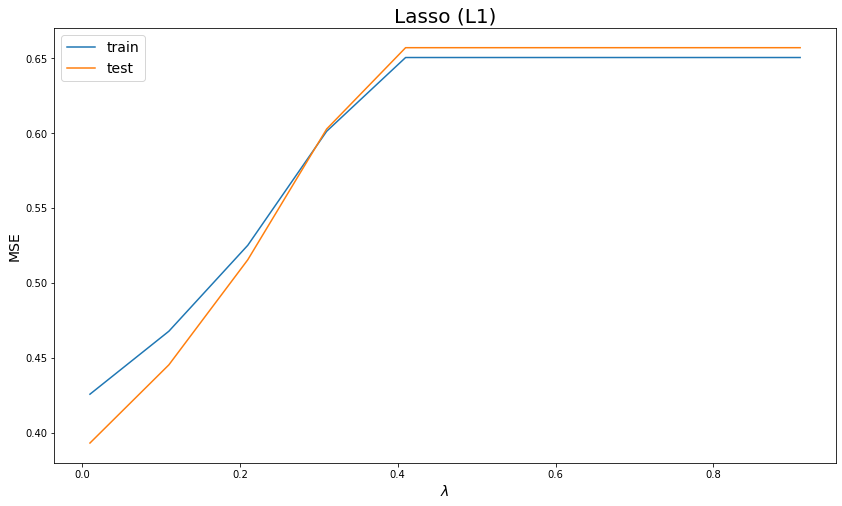

In [ ]:
def lasso_model(lambdas):
  training_errors = [] # we will store the error on the training set, for using each different lambda
  testing_errors = [] # and the error on the testing set

  for l in lambdas:
    # in sklearn, they refer to lambda as alpha, the name is different in different literature
    # Model is Lasso
    model = Lasso(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
    model.fit(X_train_normalized, y_train)

    training_predictions = model.predict(X_train_normalized)
    training_mse = mean_squared_error(y_train, training_predictions)
    training_errors.append(training_mse)

    testing_predictions = model.predict(X_test_normalized)
    testing_mse = mean_squared_error(y_test, testing_predictions)
    testing_errors.append(testing_mse)

    print(f'Coefficient when alpha is {l}: {model.coef_}\n')

  return training_errors, testing_errors

# let's generate different values for lambda/alpha
lambdas = np.arange(0.01, 1.0, step=0.1)

lasso_train, lasso_test = lasso_model(lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso (L1)")

## Linear Regression with Ridge (L2) Regularization

Coefficient when alpha is 0.0: [ 0.03978916 -0.17943891 -0.02751248  0.00942128 -0.08908432  0.05801491
 -0.12000836 -0.01920444 -0.06061037  0.14681503  0.2966275 ]

Coefficient when alpha is 0.1: [ 0.03983442 -0.1794197  -0.02748327  0.00943953 -0.08907851  0.05799717
 -0.11999273 -0.01926563 -0.06056708  0.1468123   0.2965719 ]

Coefficient when alpha is 0.2: [ 0.03987953 -0.17940051 -0.02745408  0.00945773 -0.08907272  0.05797944
 -0.11997713 -0.01932668 -0.06052387  0.14680955  0.29651638]

Coefficient when alpha is 0.30000000000000004: [ 0.0399245  -0.17938133 -0.02742489  0.00947588 -0.08906693  0.05796173
 -0.11996154 -0.01938758 -0.06048076  0.14680679  0.29646095]

Coefficient when alpha is 0.4: [ 0.03996932 -0.17936217 -0.02739571  0.00949398 -0.08906114  0.05794404
 -0.11994597 -0.01944833 -0.06043773  0.146804    0.29640562]

Coefficient when alpha is 0.5: [ 0.040014   -0.17934302 -0.02736653  0.00951203 -0.08905537  0.05792636
 -0.11993041 -0.01950894 -0.06039479  0.14680

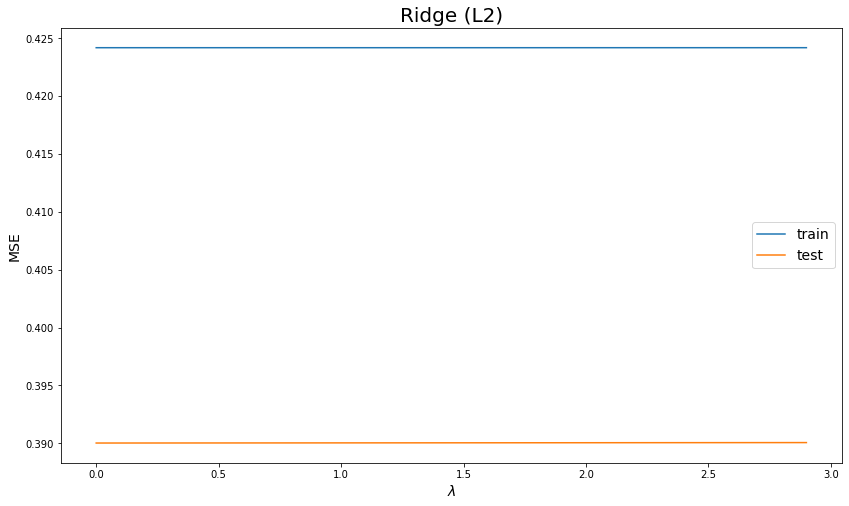

In [ ]:
def ridge_model(lambdas):
  training_errors = [] # we will store the error on the training set, for using each different lambda
  testing_errors = [] # and the error on the testing set

  for l in lambdas:
    # in sklearn, they refer to lambda as alpha, the name is different in different literature
    # Model is Ridge or ElasticNet
    model = Ridge(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
    model.fit(X_train_normalized, y_train)

    training_predictions = model.predict(X_train_normalized)
    training_mse = mean_squared_error(y_train, training_predictions)
    training_errors.append(training_mse)

    testing_predictions = model.predict(X_test_normalized)
    testing_mse = mean_squared_error(y_test, testing_predictions)
    testing_errors.append(testing_mse)

    print(f'Coefficient when alpha is {l}: {model.coef_}\n')

  return training_errors, testing_errors

# let's generate different values for lambda/alpha
lambdas = np.arange(0, 3, step=0.1)

ridge_train, ridge_test = ridge_model(lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge (L2)")

## Linear Regression with Elastic Regularization

Coefficient when alpha is 0.01: [ 0.01085668 -0.17075537 -0.00130282  0.         -0.08553983  0.04590503
 -0.10995664 -0.         -0.05712563  0.13706456  0.29929705]

Coefficient when alpha is 0.11: [ 0.00383387 -0.16304457  0.         -0.         -0.0062555  -0.
 -0.03431819 -0.         -0.          0.07124129  0.26171957]

Coefficient when alpha is 0.21000000000000002: [ 0.         -0.13147328  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.03074493  0.22227175]

Coefficient when alpha is 0.31000000000000005: [ 0.         -0.09761105  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.17812499]

Coefficient when alpha is 0.41000000000000003: [ 0.         -0.05943447  0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.13590136]

Coefficient when alpha is 0.51: [ 0.         -0.02380768  0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          

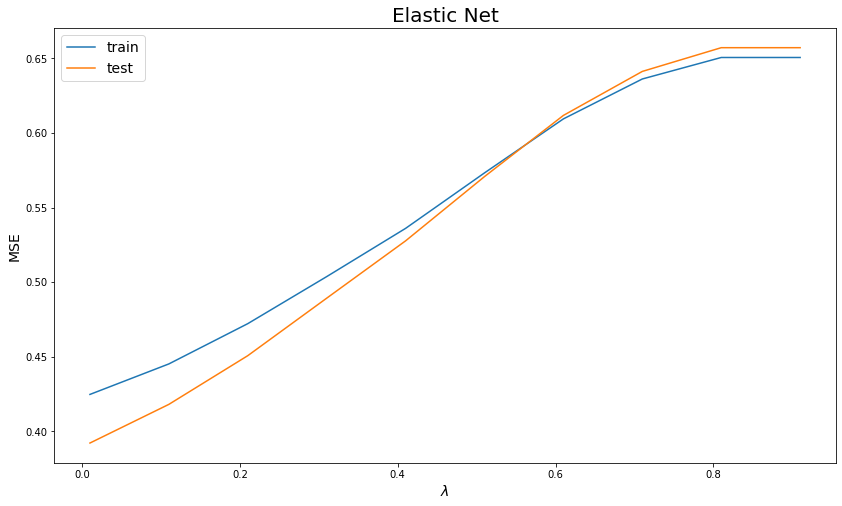

In [ ]:
def elastic_net_model(lambdas):
  training_errors = [] # we will store the error on the training set, for using each different lambda
  testing_errors = [] # and the error on the testing set

  for l in lambdas:
    # in sklearn, they refer to lambda as alpha, the name is different in different literature
    # Model is Elastic Net
    model = ElasticNet(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
    model.fit(X_train_normalized, y_train)

    training_predictions = model.predict(X_train_normalized)
    training_mse = mean_squared_error(y_train, training_predictions)
    training_errors.append(training_mse)

    testing_predictions = model.predict(X_test_normalized)
    testing_mse = mean_squared_error(y_test, testing_predictions)
    testing_errors.append(testing_mse)

    print(f'Coefficient when alpha is {l}: {model.coef_}\n')

  return training_errors, testing_errors

# let's generate different values for lambda/alpha
lambdas = np.arange(0.01, 1.0, step=0.1)

elastic_train, elastic_test = elastic_net_model(lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")

## Support Vector Regression

In [ ]:
# Support Vector Regression (SVR) model
regressor = SVR(kernel='rbf', C=10)
regressor.fit(X_train_normalized, y_train)

y_pred = regressor.predict(X_test_normalized)

# RMSE (Root Mean Squared Error) and Mean Squared Error
rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
mse = float(mean_squared_error(y_test, y_pred))
print(f'\nRMSE: {rmse:.4f}\nMSE: {mse:.4f}')


RMSE: 0.6034
MSE: 0.3641
